<a href="https://colab.research.google.com/github/Gitika-26/Lake-Eutrophication-Model/blob/main/Lake_Eutrophication_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carpenter Lake Eutrophication Model**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
from ipywidgets import interact, FloatSlider,IntSlider


### *Defining Model and Parameters & Equations*

In [ ]:
def create_parameters(s=1.0,r=2.0,m=1.0,q=8):
    params = {"s": s,"r": r,"m": m,"q": q}
    return params

# s - phosphorus removal rate (higher = lake cleans faster)
# r - recycling strength (higher = more internal recycling)
# m - half-saturation constant (controls recycling threshold)
# q - nonlinearity exponent (higher = sharper tipping point)

### *Model Equation*

In [ ]:
def lake_model(P, L, params):

    s = params["s"]
    r = params["r"]
    m = params["m"]
    q = params["q"]

    recycling = r * P**q / (m**q + P**q)

    return L - s*P + recycling


### *Derivative function(For Stability)*




In [ ]:
def stability_derivative(P, params):
    s = params["s"]
    r = params["r"]
    m = params["m"]
    q = params["q"]

    numerator = r*q*(P**(q-1))*m**q
    denominator = (m**q + P**q)**2

    return -s + numerator/denominator

### *Find Fixed Points*

In [ ]:
def find_fixed_points(L, params):
 roots = []
 guesses = np.linspace(0,5,20)
 for guess in guesses:
  try:
    root = fsolve(lake_model, guess, args=(L,params))[0]
    if root>=0 and root<=5:
      if not any(np.isclose(root, roots, atol=1e-3)):
        roots.append(root)
  except:
    pass

 return roots

### *Bifurcation Plot Function*

In [ ]:
def plot_bifurcation(params,L_min=0,L_max=3,num_points=400):


    L_values = np.linspace(L_min, L_max, num_points)

    stable_L = []
    stable_P = []

    unstable_L = []
    unstable_P = []

    for L in L_values:

        roots = find_fixed_points(L, params)

        for root in roots:

            d = stability_derivative(root, params)

            if d < 0:

                stable_L.append(L)
                stable_P.append(root)

            else:

                unstable_L.append(L)
                unstable_P.append(root)


    plt.figure(figsize=(8,6))
    plt.scatter(stable_L, stable_P, s=8,label="Stable", color="blue")
    plt.scatter(unstable_L, unstable_P, s=8,label="Unstable", color="red")
    plt.xlabel("External Phosphorus Loading (L)")
    plt.ylabel("Lake Phosphorus Concentration (P)")
    plt.title("Lake Eutrophication Bifurcation Diagram")
    plt.legend()
    plt.show()

### *Time Simulation Function*

In [ ]:
def simulate_time(L, params,P0=0.2,dt=0.01,T=100):

    steps = int(T/dt)

    P = P0

    history = []

    for i in range(steps):

        P = P + dt*lake_model(P,L,params)

        if P<0:
            P=0

        history.append(P)

    return history

### *Looking at the solutions for  Different Parameters*

### *Parameters - (s = 1.0, r = 2.0, m = 1.0, q = 8)*

/tmp/ipython-input-600184830.py:6: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  root = fsolve(lake_model, guess, args=(L,params))[0]
/tmp/ipython-input-600184830.py:6: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  root = fsolve(lake_model, guess, args=(L,params))[0]


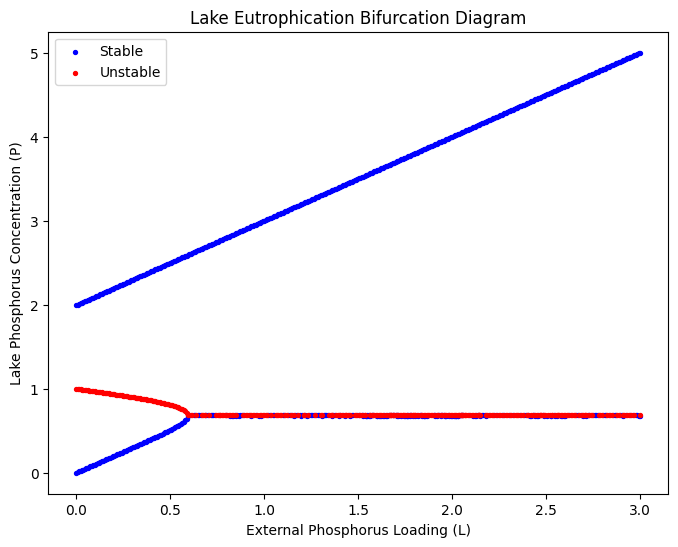

In [ ]:
# create parameter set
params = create_parameters(s = 1.0, r = 2.0,m = 1.0,q = 8)

# plot bifurcation
plot_bifurcation(params)

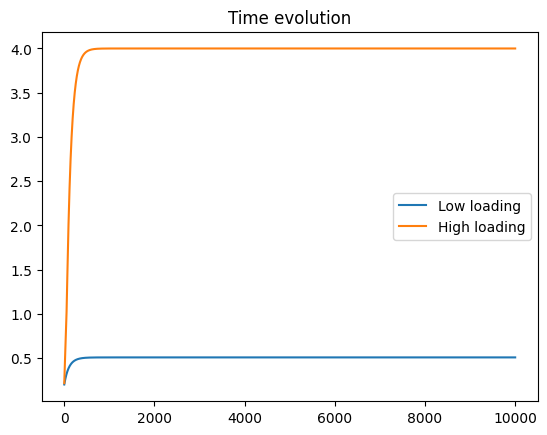

In [ ]:
# simulate two cases
P1 = simulate_time(L=0.5, params=params)
P2 = simulate_time(L=2.0, params=params)
plt.figure()
plt.plot(P1, label="Low loading")
plt.plot(P2, label="High loading")
plt.title("Time evolution")
plt.legend()
plt.show()

### *Parameters - (s = 1.0, r = 2.5, m = 3.0, q = 4)*

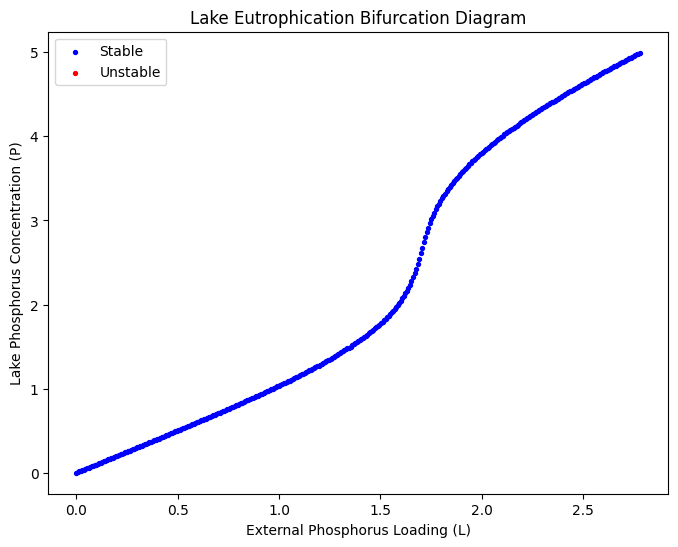

In [ ]:
# create parameter set
params = create_parameters(s = 1.0, r = 2.5,m = 3.0,q = 4)

# plot bifurcation
plot_bifurcation(params)

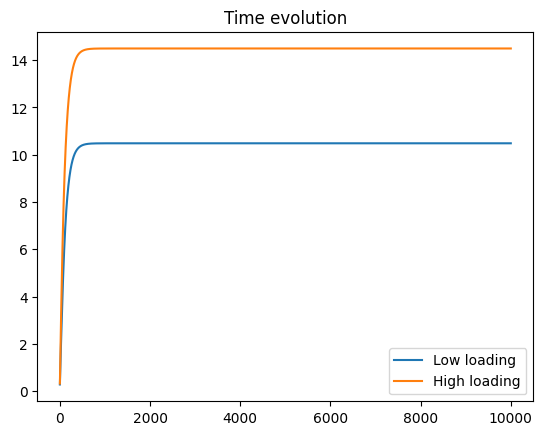

In [ ]:
# simulate two cases
P1 = simulate_time(L=8.0, params=params)
P2 = simulate_time(L=12.0, params=params)
plt.figure()
plt.plot(P1, label="Low loading")
plt.plot(P2, label="High loading")
plt.title("Time evolution")
plt.legend()
plt.show()

### *The State of the System Interactive Plot*

In [ ]:
def lake_model_minimal(t, P, L, s, r, m, q):

    return L - s*P + (r * P**q) / (m**q + P**q)


# function to compute bifurcation
def interactive_bifurcation(s=0.5, r=1.5, m=1.0, q=8):

    L_values = np.linspace(0, 3, 200)

    P_final = []

    for L in L_values:
      sol = solve_ivp(lake_model_minimal,[0, 200],[0.1],args=(L, s, r, m, q),t_eval=[200])
      P_final.append(sol.y[0][-1])


    plt.figure(figsize=(8,5))
    plt.plot(L_values, P_final, color='blue')
    plt.xlabel("Loading rate (L)")
    plt.ylabel("Equilibrium Phosphorus (P)")

    plt.title("Interactive Bifurcation Diagram (Minimal Model)")

    plt.grid()

    plt.show()


# create sliders
interact(interactive_bifurcation,s = FloatSlider(min=0.1, max=1.0, step=0.1, value=0.5),r = FloatSlider(min=0.5, max=3.0, step=0.1, value=1.5),m = FloatSlider(min=0.5, max=2.0, step=0.1, value=1.0),
q = IntSlider(min=2, max=20, step=1, value=8))

interactive(children=(FloatSlider(value=0.5, description='s', max=1.0, min=0.1), FloatSlider(value=1.5, descri…

<function __main__.interactive_bifurcation(s=0.5, r=1.5, m=1.0, q=8)>

# **Extended Carpenter Lake Model**
### **Introducing parameter b - permanent burial rate of phosphorus**

### *Finding Fixed Points and Plotting Bifurcations*

In [ ]:
def create_parameters(s=1.0, r=2.0, m=1.0, q=8, b=0.1):
  params = {"s": s,"r": r,"m": m,"q": q,"b": b}
  return params

# s - phosphorus removal rate
# r - recycling strength
# m - half-saturation constant
# q - nonlinearity exponent
# b - burial rate (permanent phosphorus loss)

In [ ]:
def lake_model(P, L, params):

    s = params["s"]
    r = params["r"]
    m = params["m"]
    q = params["q"]
    b = params["b"]

    recycling = r * P**q / (m**q + P**q)

    return L - s*P + recycling - b*P

In [ ]:
def lake_model_derivative(P, params):

    s = params["s"]
    r = params["r"]
    m = params["m"]
    q = params["q"]
    b = params["b"]

    # derivative of recycling term
    recycling_derivative = (r * q * m**q * P**(q-1)) / (m**q + P**q)**2

    # full derivative
    dfdP = -s - b + recycling_derivative

    return dfdP

/tmp/ipython-input-1146954500.py:25: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  root = fsolve(lake_model, guess, args=(L, params))[0]
/tmp/ipython-input-1146954500.py:25: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  root = fsolve(lake_model, guess, args=(L, params))[0]


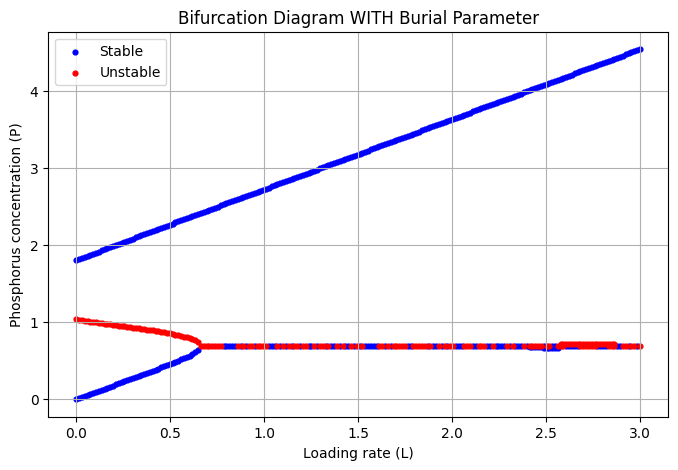

In [ ]:
params = create_parameters()


L_values = np.linspace(0, 3, 200)


stable_P = []
stable_L = []

unstable_P = []
unstable_L = []


guesses = np.linspace(0, 5, 50)


for L in L_values:

    fixed_points = []

    for guess in guesses:

        try:

            root = fsolve(lake_model, guess, args=(L, params))[0]

            if 0 <= root <= 5:

                if not any(abs(root - fp) < 0.01 for fp in fixed_points):

                    fixed_points.append(root)

        except:

            pass


    for fp in fixed_points:

        stability = lake_model_derivative(fp, params)

        if stability < 0:

            stable_P.append(fp)
            stable_L.append(L)

        else:

            unstable_P.append(fp)
            unstable_L.append(L)



# Plot
plt.figure(figsize=(8,5))

plt.scatter(stable_L, stable_P,
            color="blue",
            s=12,
            label="Stable")

plt.scatter(unstable_L, unstable_P,
            color="red",
            s=12,
            label="Unstable")


plt.xlabel("Loading rate (L)")
plt.ylabel("Phosphorus concentration (P)")

plt.title("Bifurcation Diagram WITH Burial Parameter")

plt.legend()

plt.grid()

plt.show()

### *Interactive Bifurcation Plot*

In [ ]:
def interactive_bifurcation(r=1.5, q=8):
    # Default values for s, m, b
    s_val = 0.5
    m_val = 1.0
    b_val = 0.1 # Additional parameter for this extended model


    if 'params' in globals() and isinstance(params, dict):
        s_val = params.get("s", s_val)
        m_val = params.get("m", m_val)


    test_params = (s_val, r, m_val, q, b_val)

    def model_ode(t, P_current, L_external):
        s_param, r_param, m_param, q_param, b_param = test_params
        return L_external - s_param * P_current + (r_param * P_current**q_param) / (m_param**q_param + P_current**q_param) - b_param * P_current

    L_vals = np.linspace(0, 3, 150)
    P_final = []

    for L_loop_val in L_vals:
        sol = solve_ivp(lambda t, y: model_ode(t, y, L_loop_val), [0, 200], [0.1])
        P_final.append(sol.y[0][-1])

    plt.figure(figsize=(8, 5))
    plt.plot(L_vals, P_final)
    plt.xlabel("External Phosphorus Loading (L)")
    plt.ylabel("Lake Phosphorus Concentration (P)")
    plt.title("Interactive Bifurcation Diagram")
    plt.show()

interact(interactive_bifurcation,
         r=FloatSlider(min=0.5, max=3, value=1.5, step=0.1, description='Recycling (r)'),
         q=FloatSlider(min=2, max=20, value=8, step=1, description='Nonlinearity (q)'))

interactive(children=(FloatSlider(value=1.5, description='Recycling (r)', max=3.0, min=0.5), FloatSlider(value…

<function __main__.interactive_bifurcation(r=1.5, q=8)>

### *Basin of Attraction*
#### The basin of attraction describes how the long-term state of the lake depends on its initial phosphorus concentration. For the same external loading and parameter values, the system can evolve toward different stable equilibria depending on where it starts. In the eutrophication model, there are typically two stable states: a low-phosphorus (oligotrophic) clean lake and a high-phosphorus (eutrophic) polluted lake. The basin of attraction plot shows which initial conditions lead to each of these stable states. It also reveals the presence of a critical threshold, known as the separatrix, which separates the basins of attraction of the two equilibria.

Threshold initial phosphorus = 3.6180904522613067


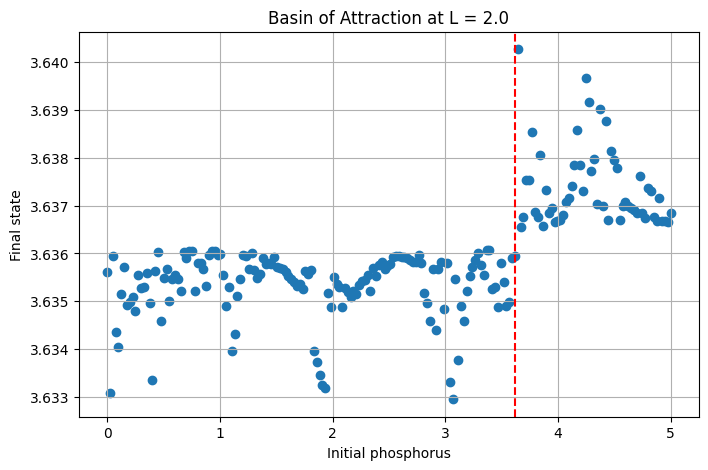

In [ ]:
L_value = 2.0   # CRITICAL CHANGE

initial_conditions = np.linspace(0,5,200)

final_states = []

for P0 in initial_conditions:

    sol = solve_ivp(lambda t,y: lake_model(y, L_value, params),[0,500],[P0])

    final_states.append(sol.y[0][-1])
final_states = np.array(final_states)


# threshold occurs where final state jumps suddenly
diff = np.abs(np.diff(final_states))

threshold_index = np.argmax(diff)

threshold_initial = initial_conditions[threshold_index]


print("Threshold initial phosphorus =", threshold_initial)



plt.figure(figsize=(8,5))

plt.scatter(initial_conditions, final_states)
# threshold line
plt.axvline(threshold_initial,color='red',linestyle='--',label='Threshold')

plt.xlabel("Initial phosphorus")

plt.ylabel("Final state")

plt.title(f"Basin of Attraction at L = {L_value}")

plt.grid()

plt.show()